In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
%matplotlib inline
from datetime import date
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

C:\Users\cside\AppData\Local\Temp\ipykernel_6468\2850242464.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [2]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))


# reference: https://mentalitch.com/key-events-in-rock-and-roll-history/
dates = [date(1954, 7, 19), date(1959, 2, 3), date(1964, 2, 9), date(1965, 7, 25), date(1967, 6, 1), date(1969, 8, 15)]
min_date = date(np.min(dates).year - 2, np.min(dates).month, np.min(dates).day)
max_date = date(np.max(dates).year + 2, np.max(dates).month, np.max(dates).day)
 
labels = ['Elvis appears on\nthe Ed Sullivan Show', 'Buddy Holly dies', 'The Beatles appear\non the Ed Sullivan Show', 
          'Bob Dylan goes electric', 'The Beatles release\nSgt. Pepper', 'Woodstock']
# labels with associated dates
labels = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (labels, dates)]

In [3]:
# reference: https://mentalitch.com/key-events-in-rock-and-roll-history/
dates = [date(1997, 1, 1), date(2000, 1, 1), date(2002, 1, 1), date(2007, 1, 1), date(2011, 1, 1), date(2015, 1, 1), date(2017, 1, 1)]
min_date = date(np.min(dates).year - 2, np.min(dates).month, np.min(dates).day)
max_date = date(np.max(dates).year + 2, np.max(dates).month, np.max(dates).day)
 
labels = ['Oxycodone hit the market as \ntime released nonadditive pain medicine s', 'Oxycodone sales hit \n1.1 billion', 
          'crushing and snorting \nbreaks time release', 'Purdue admits all \nalong oxycodone additive', 'New formula \nimpossible to break \nillict drug use surges', 'Fentanyl on the \nstreets of TN', 'USA declares opiate epidemic \nrestricts opiate prescriptons']
# labels with associated dates
labels = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (labels, dates)]

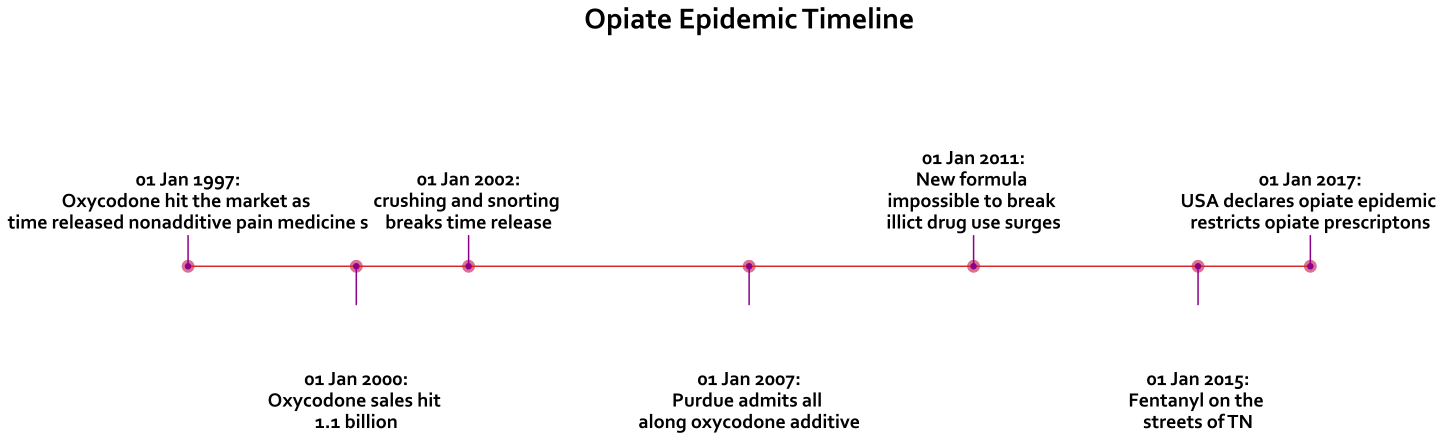

In [6]:
#improve res
#plt.rcParams['figure.dpi'] = 150
#plt.rcParams['savefig.dpi'] = 150

fig, ax = plt.subplots(figsize=(20, 6), constrained_layout=True)
_ = ax.set_ylim(-2, 3.0)
_ = ax.set_xlim(min_date, max_date)
#_ = ax.axhline(0, xmin=0.5, xmax=1.0, c='deeppink', zorder=1)
_ =ax.hlines(y = 3, xmin = 1, xmax = 2, color = 'deeppink', linewidth = 25, capstyle = 'projecting', label = 'linewidth = 25, "projecting" capstyle')
 
_ = ax.scatter(dates, np.zeros(len(dates)), s=140, c='palevioletred', zorder=2)
_ = ax.scatter(dates, np.zeros(len(dates)), s=30, c='darkmagenta', zorder=3)
label_offsets = np.zeros(len(dates))
label_offsets[::2] = 0.49
label_offsets[1::2] = -2.1
for i, (l, d) in enumerate(zip(labels, dates)):
    _ = ax.text(d, label_offsets[i], l, ha='center', fontfamily='Corbel', fontweight='bold', color='black',fontsize=20)
stems = np.zeros(len(dates))
stems[::2] = .40
stems[1::2] = -.50   
markerline, stemline, baseline = ax.stem(dates, stems, use_line_collection=True)
_ = plt.setp(markerline, marker=',', color='darkmagenta')
_ = plt.setp(stemline, color='darkmagenta')
# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
 
# hide tick labels
_ = ax.set_xticks([])
_ = ax.set_yticks([])
 
_ = ax.set_title('Opiate Epidemic Timeline', fontweight="bold", fontfamily='Corbel', fontsize=30, 
                 color='black')
ax.figure.savefig('demo-file.jpg')
